 **Riky Raharjo,
 Fadila Rizka N,
 M Fadzli.**

## **Import Drive and Route to Directory**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Import Library yang dibutuhkan**

In [2]:
# Step 1: Import Library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
# Step 2: Load and Preprocess Data
# Path to the dataset
data_path = "/content/gdrive/MyDrive/Bangkit 2024/Capstone Bangkit/ML Task/dataset"

In [5]:
# Image generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [7]:
# Load data training
train_generator = train_datagen.flow_from_directory(
    data_path + '/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1350 images belonging to 30 classes.


In [9]:
# Load data validasi
validation_generator = train_datagen.flow_from_directory(
    data_path + '/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 330 images belonging to 30 classes.


In [10]:
# Bangun arsitektur model
# Step 3: Build the CNN Model
model = Sequential()

# First Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

In [11]:
# Compile the model
# configurasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# membuat callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [ ]:
# Train the model
# process training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
36/42 [========================>.....] - ETA: 1:08 - loss: 3.4170 - accuracy: 0.0249

In [ ]:
# Evaluasi model

val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')
print(f'Validation Loss: {val_loss:.4f}')

Epoch 1/105
30/30 [==============================] - ETA: 0s - loss: 3.4215 - accuracy: 0.0214 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 1121s 37s/step - loss: 3.4215 - accuracy: 0.0214 - val_loss: 3.4009 - val_accuracy: 0.0357
Epoch 2/105
30/30 [==============================] - 19s 636ms/step - loss: 3.4015 - accuracy: 0.0399 - val_loss: 3.3922 - val_accuracy: 0.0842
Epoch 3/105
30/30 [==============================] - 21s 706ms/step - loss: 3.3711 - accuracy: 0.0452 - val_loss: 3.1319 - val_accuracy: 0.0893
Epoch 4/105
30/30 [==============================] - 20s 661ms/step - loss: 3.1965 - accuracy: 0.0994 - val_loss: 2.7164 - val_accuracy: 0.1480
Epoch 5/105
30/30 [==============================] - 20s 675ms/step - loss: 3.0869 - accuracy: 0.1113 - val_loss: 2.6233 - val_accuracy: 0.2449
Epoch 6/105
30/30 [==============================] - 19s 631ms/step - loss: 2.9558 - accuracy: 0.1304 - val_loss: 2.4454 - val_accuracy: 0.2168
Epoch 7/105
30/30 [==============================] - 19s 627ms/step - loss: 2.8561 - accuracy: 0.1625 - val_loss: 2.3669 - val_accuracy: 0.2832
Epoc

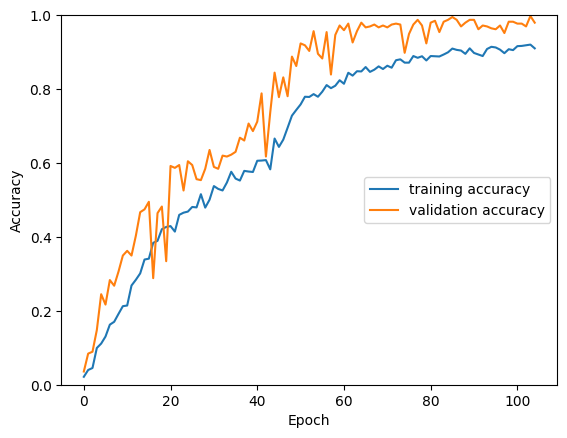

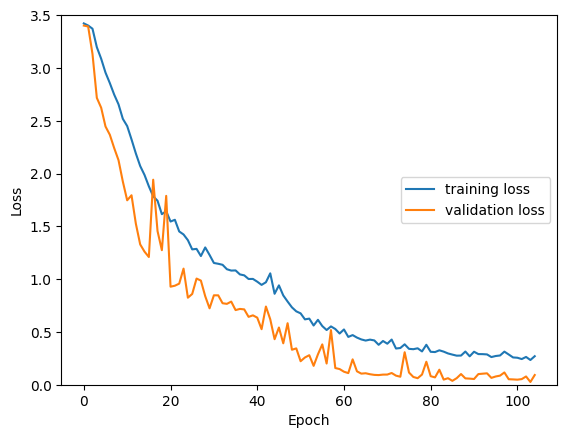

In [ ]:
# plotting training graph

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# plotting validasi accuracy

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

OSError: No file or directory found at hijaiyah.h5

In [ ]:
# Save the model.
model.save('hijaiya_cnn_model.h5')